In [17]:
# Importing modules

import socks
import socket
import requests
from bs4 import BeautifulSoup

In [18]:
# Configuring Socks to use Tor

from urllib.request import urlopen
socks.set_default_proxy(socks.SOCKS5, "localhost", 9150)

old_socket = socket.socket # saving old socket info 
socket.socket = socks.socksocket

In [19]:
# It is necessary to use Tor for DNS resolution of Onion websites

def getaddrinfo(*args):
    return [(socket.AF_INET, socket.SOCK_STREAM, 6, '', (args[0], args[1]))]

socket.getaddrinfo = getaddrinfo

In [21]:
# Using requests package to read in the Hidden Wiki Onion Website on the Darknet

snatch_link = "http://hl66646wtlp2naoqnhattngigjp5palgqmbwixepcjyq5i534acgqyad.onion/index.php?page=1"
res = requests.get(snatch_link)

In [22]:
# Using beautifulsoup to get the website content into a nice format

soup = BeautifulSoup(res.content, 'html.parser')

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   News
  </title>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <link href="../assets/css/reset.css" rel="stylesheet"/>
  <link href="../assets/css/bootstrap-grid.min.css" rel="stylesheet"/>
  <link href="../assets/css/style.css" rel="stylesheet"/>
  <script src="../assets/js/jquery.min.js">
  </script>
 </head>
 <body>
  <div class="wrapper">
   <div class="mainModal" id="UUID">
    <div class="modalUUID">
     <a class="close" href="" title="Close">
      X
     </a>
     <h2>
      ENTER UUID
     </h2>
     <p>
      To contact us, you must enter your personal UUID in the field below and press ENTER.
            After logging in, you will receive detailed information about your company.
     </p>
     <form action="" method="post">
      <input class="uuid-input" minlength="20" name="uuid" placeholder="XXXX-XXXX-XXXX-XXXX" required="" type="text"/>
      <input name="uuid_redirect" type="hidd
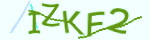

In [23]:
# Having a look at the Website content

print(soup.prettify())

In [24]:
# Getting all victim companies
snatch_links = ["http://hl66646wtlp2naoqnhattngigjp5palgqmbwixepcjyq5i534acgqyad.onion",
                    "http://hl66646wtlp2naoqnhattngigjp5palgqmbwixepcjyq5i534acgqyad.onion/index.php?page=1&per-page=5"]

header_list = []

for link in snatch_links:
    res = requests.get(link)
    soup = BeautifulSoup(res.content, 'html.parser')
    div_tags = soup.find_all("div", class_="a-b-n-name")

    for tag in div_tags:
        header_list.append(tag.text)
        
print(header_list)

['Stratford University', 'The Execu|Search Group', 'Lootah Group', 'LAVA', 'Hall Cross Academy', 'Atlantic Dialysis Management Services', 'HEMERIA', 'Apex', 'Warren Resources', 'Xtera', 'Stratford University', 'The Execu|Search Group', 'Lootah Group', 'LAVA', 'Hall Cross Academy', 'Atlantic Dialysis Management Services', 'HEMERIA', 'Apex', 'Warren Resources', 'Xtera']


In [25]:
import pandas as pd
import numpy as np

df = pd.DataFrame(columns=['Snatch Headers', 'Company Name', 'Industry', 'Headquarters'])
df['Snatch Headers'] = header_list

df.to_csv('Snatch.csv')

df

,Snatch Headers,Company Name,Industry,Headquarters
0,Stratford University,NaN,NaN,NaN
1,The Execu|Search Group,NaN,NaN,NaN
2,Lootah Group,NaN,NaN,NaN
3,LAVA,NaN,NaN,NaN
4,Hall Cross Academy,NaN,NaN,NaN
5,Atlantic Dialysis Management Services,NaN,NaN,NaN
6,HEMERIA,NaN,NaN,NaN
7,Apex,NaN,NaN,NaN
8,Warren Resources,NaN,NaN,NaN
9,Xtera,NaN,NaN,NaN


In [31]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install webdriver-manager

In [33]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

socket.socket = old_socket # reuse the original socket for selenium

driver = webdriver.Chrome('C:\Program Files\chromedriver')
driver.maximize_window()

WebDriverException: Message: Can not connect to the Service C:\Program Files\chromedriver.exe


## Stuck here couldn't get chromedriver to work

In [ ]:
# glassdoor search
company_list = []
industry_list = []
location_list = []
number = 0

for header in header_list: 
    try:
        driver.get('https://www.google.com')
        search = driver.find_element(By.NAME, 'q')
        search.send_keys(header + ' glassdoor "overview"')
        search.send_keys(Keys.RETURN)
        glassdoor_page = driver.find_element_by_tag_name('h3') # clicking the first search result
        glassdoor_page.click()
        
        if "glassdoor" in driver.current_url:
            company = driver.find_element_by_tag_name('h1')
            company_list.append(company.text)
            
            pagesource = driver.page_source
            soup = BeautifulSoup(pagesource, 'html.parser')
            labels = soup.find_all('label')
            for label in labels:
                if (label.text == "Industry:"):
                    industry = label.next_sibling.text
                    industry_list.append(industry)
                    break
            else:
                industry_list.append(np.nan)
                
            for label in labels:
                if (label.text == "Headquarters:"):
                    location = label.next_sibling.text
                    location_list.append(location)
                    break
            else:
                location_list.append(np.nan)
        else:
            company_list.append(np.nan)
            industry_list.append(np.nan)
            location_list.append(np.nan)
    except Exception as e:
        company_list.append(np.nan)
        industry_list.append(np.nan)
        location_list.append(np.nan)
        print(e)

    print(str(number) + ") " + header)
    number = number + 1
    
driver.quit()

In [ ]:
# Storing scraped data into DataFrame + Cleaning data
df['Snatch Headers'] = header_list
df['Company Name'] = company_list
df['Industry'] = industry_list
df['Headquarters'] = location_list
df = df.dropna()
df = df.drop_duplicates()
df = df.reset_index(drop=True) # reset index
df

df.to_csv('Snatch.csv')